# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [18]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from random import sample
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

In [19]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want

In [20]:
def distSquared(point1, point2):
    assert point1.shape == point2.shape
    return np.sum(np.square(point1- point2))

In [21]:
def chooseKRandomCentroids(X, K):
    rand_indices = sample(range(0, X.shape[0]), K)
    return np.array([X[i] for i in rand_indices])

In [22]:
def findClosestCentroids(X, centroids):
    """
    Function takes in the (N,P) X matrix
    (where N is the # of points, P is # of features per point)
    and the (K,P) centroid seed matrix
    (where K is the # of centroids (clusters)
    and returns a (N,1) vector of cluster indices 
    per point in X (0 through K-1)
    """
    idxs = []
    sum_of_distance = 0.0
    for i in range(X.shape[0]):
        
        mindist, idx  = 1e8, 0
        for k in range(centroids.shape[0]):
            dist = distSquared(X[i], centroids[k])
            if dist < mindist:
                mindist = dist
                idx = k
        idxs.append(idx)
        sum_of_distance += mindist
    return idxs, sum_of_distance

In [23]:
initial_centroid = chooseKRandomCentroids(x, k)
idxs = findClosestCentroids(x, initial_centroid)

In [24]:
def computeCentroids(X, idxs, K):
    """
    Function takes in the X matrix and the index vector
    and computes a new centroid matrix.
    """
    subX = []
    for k in range(K):
        subX.append(np.array([X[i] for i in range(X.shape[0]) if idxs[i] == k]))
    return np.array([np.mean(thisX, axis=0) for thisX in subX])

In [30]:
def kmeans(x, k):
    '''
    KMEANS K-Means clustering algorithm

        Input:  x - data point features, n-by-p maxtirx.
                k - the number of clusters

        OUTPUT: idx  - cluster label
                ctrs - cluster centers, K-by-p matrix.
                iter_ctrs - cluster centers of each iteration, (iter, k, p)
                        3D matrix.
    '''
    # YOUR CODE HERE

    # begin answer
    n_iters = 30
    epsilon = 1e-8
    loss = []
    initial_centroids = chooseKRandomCentroids(x, k)
    idx, sum_of_distance = findClosestCentroids(x, initial_centroids)
    ctrs = computeCentroids(x, idx, k)
    iter_ctrs = np.expand_dims(ctrs, axis=0)
    loss.append((1./(2*x.shape[0])) * sum_of_distance)
    print("iter[{}]---loss:{}".format(0, loss[0]))
    for iters in range(1, n_iters):
        idx, sum_of_distance = findClosestCentroids(x, ctrs)
        ctrs = computeCentroids(x, idx, k)
        iter_ctrs = np.vstack((iter_ctrs, np.expand_dims(ctrs, axis=0)))
        loss.append((1./(2*x.shape[0])) * sum_of_distance)
        print("iter[{}]---loss:{}".format(iters, loss[iters]))
        if (abs(loss[iters-1] - loss[iters]) < epsilon):
              break
    # end answer
    return idx, ctrs, iter_ctrs

In [26]:
idx, ctrs, iter_ctrs = kmeans(x, k)

iter[0]---loss:3.0168345820759193
iter[1]---loss:1.2292788352313688
iter[2]---loss:0.984348763355754
iter[3]---loss:0.9175210487090065
iter[4]---loss:0.9133130706562927
iter[5]---loss:0.9118879587640817
iter[6]---loss:0.9111978848607473
iter[7]---loss:0.9109906062267121
iter[8]---loss:0.9108909238685284
iter[9]---loss:0.9106904334084418
iter[10]---loss:0.910509628255452
iter[11]---loss:0.910509628255452


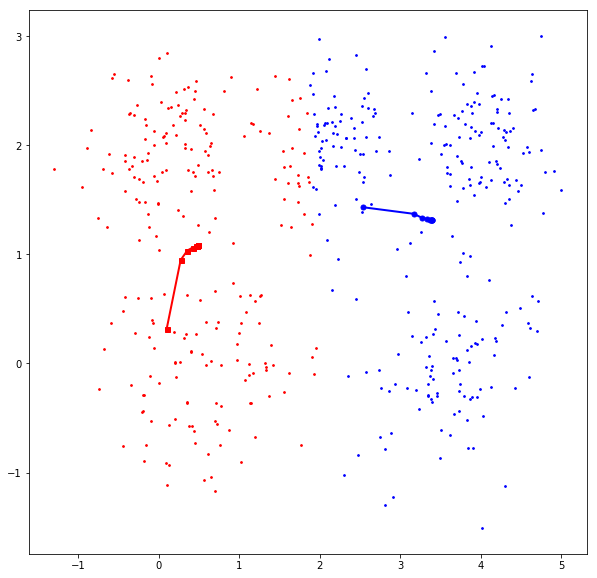

In [10]:
kmeans_plot(x, idx, ctrs, iter_ctrs)

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

iter[0]---loss:14.425825628702873
iter[1]---loss:9.183727234360171
iter[2]---loss:8.918068351619851
iter[3]---loss:8.796927384298538
iter[4]---loss:8.723156911874293
iter[5]---loss:8.677480090296681
iter[6]---loss:8.641396657483838
iter[7]---loss:8.61216386730148
iter[8]---loss:8.588347952474209
iter[9]---loss:8.568589072704981
iter[10]---loss:8.550365657364681
iter[11]---loss:8.532387543870758
iter[12]---loss:8.514198442973129
iter[13]---loss:8.491612154774481
iter[14]---loss:8.468598137488026
iter[15]---loss:8.445910182676451
iter[16]---loss:8.433377347194263
iter[17]---loss:8.428846558386125
iter[18]---loss:8.426770538683822
iter[19]---loss:8.425508340861137
iter[20]---loss:8.424583526305865
iter[21]---loss:8.423363243948044
iter[22]---loss:8.422206830303507
iter[23]---loss:8.421344308570612
iter[24]---loss:8.420512639455618
iter[25]---loss:8.420043637624895
iter[26]---loss:8.419341992049617
iter[27]---loss:8.418380142350737
iter[28]---loss:8.416976348375487
iter[29]---loss:8.415922

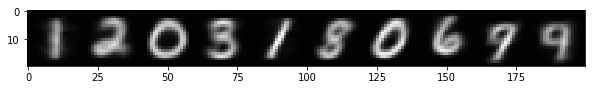

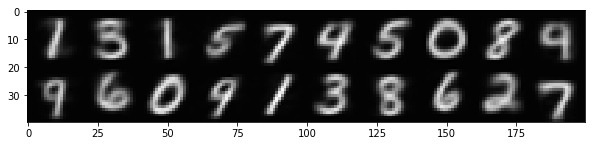

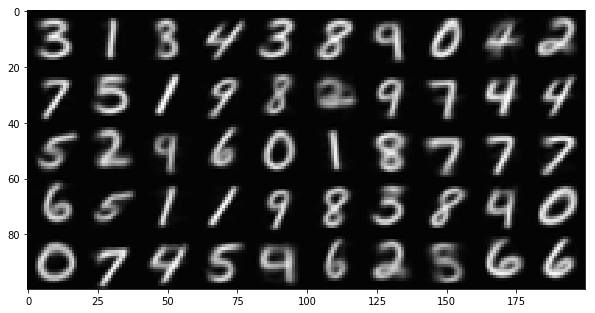

In [34]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

iter[0]---loss:825.8721536874758
iter[1]---loss:288.12839438015334
iter[2]---loss:238.5573225786464
iter[3]---loss:209.44896519191815
iter[4]---loss:190.35358830444417
iter[5]---loss:177.82137285583798
iter[6]---loss:169.97724762161093
iter[7]---loss:164.9242847189071
iter[8]---loss:161.78685507068198
iter[9]---loss:159.48028097931012
iter[10]---loss:158.02382935146116
iter[11]---loss:157.00041739498172
iter[12]---loss:156.38498181590413
iter[13]---loss:155.9669812026544
iter[14]---loss:155.67745499830812
iter[15]---loss:155.4934225326746
iter[16]---loss:155.37916344848492
iter[17]---loss:155.30438653747902
iter[18]---loss:155.26599935544422
iter[19]---loss:155.22563838331337
iter[20]---loss:155.2125738531159
iter[21]---loss:155.20127489835235
iter[22]---loss:155.18822506155573
iter[23]---loss:155.16560060083657
iter[24]---loss:155.15510646075927
iter[25]---loss:155.15049812829983
iter[26]---loss:155.14802214379552
iter[27]---loss:155.1443911672834
iter[28]---loss:155.1410021487668
ite

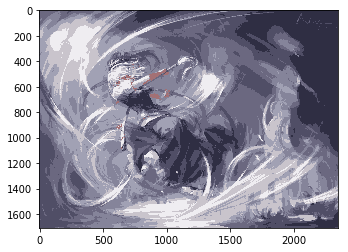

In [31]:
# import kmeans
from matplotlib.pyplot import imread
img = imread('sample2.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer
k = 8
idx, ctrs, _ = kmeans(fea, k)
for i in range(len(idx)):
    fea[i, :] = ctrs[idx[i],:] 
# end answer

plt.imshow(fea.reshape(img.shape).astype(np.uint8))


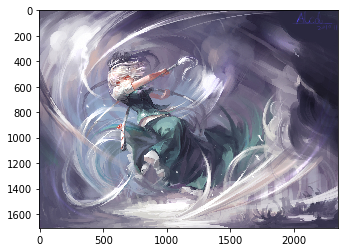

In [32]:
img = imread('sample2.jpg')
fea_origin = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
plt.imshow(fea_origin.reshape(img.shape).astype(np.uint8))